<a href="https://colab.research.google.com/github/AdritPal08/House_Price_Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Install and setup kaggle with colab**

In [1]:
#install Kaggle
!pip install -q Kaggle

In [66]:
from google.colab import files

files.upload()

In [3]:
#create a kaggle folder
! mkdir ~/.kaggle

In [4]:
# copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

In [5]:
# permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
 # to list all datasets in kaggle
#  ! kaggle datasets list

## **Downloading the dataset from Kaggle**

In [7]:
# download the dataset from kaggle
! kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 88.1MB/s]


In [8]:
# unzip the dataset
!unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


##**Installing all the required libraries**

In [9]:
!pip install -q numpy==1.21.4
!pip install -q spacy==3.4.0
!pip install -q numba==0.53

     |████████████████████████████████| 15.7 MB 30.9 MB/s 
     |████████████████████████████████| 6.3 MB 15.8 MB/s 
     |████████████████████████████████| 11.1 MB 29.8 MB/s 
     |████████████████████████████████| 3.4 MB 25.4 MB/s 
     |████████████████████████████████| 25.3 MB 1.7 MB/s 


In [10]:
!pip install -q  pycaret

     |████████████████████████████████| 320 kB 28.0 MB/s 
     |████████████████████████████████| 56 kB 256 kB/s 
     |████████████████████████████████| 2.0 MB 68.0 MB/s 
     |████████████████████████████████| 88 kB 7.3 MB/s 
     |████████████████████████████████| 1.7 MB 45.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 141 kB 57.1 MB/s 
     |████████████████████████████████| 325 kB 71.0 MB/s 
     |████████████████████████████████| 4.8 MB 49.8 MB/s 
     |████████████████████████████████| 167 kB 65.2 MB/s 
     |████████████████████████████████| 1.3 MB 56.4 MB/s 
     |████████████████████████████████| 6.8 MB 66.6 MB/s 
     |████████████████████████████████| 25.9 MB 75.4 MB/s 
     |████████████████████████████████| 17.0 MB 72.0 MB/s 
     |████████████████████████████████| 636 kB 61.4 MB/s 
     |███████████████

In [11]:
!pip install -q catboost

     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [12]:
!pip install -q xgboost==1.1.1

     |████████████████████████████████| 127.6 MB 19 kB/s 


In [13]:
# for data analysis
!pip install -q pandas_profiling

## **Importing required libraries**

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling as pp
import numpy as np

## **Importing all datasets**

In [15]:
train_dataset =pd.read_csv('train.csv')
X_test =pd.read_csv('test.csv')
Y_test =pd.read_csv('sample_submission.csv')

In [16]:
train_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
Y_test.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [18]:
X_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## **Merge two dataset**

In [19]:
test_dataset=X_test.merge(Y_test,on='Id')
test_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977


In [20]:
# statistical info

train_dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [21]:
# check for null values
null=train_dataset.isna().sum()
print(null[null > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [22]:
# datatype info

train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [23]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
train_dataset.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [24]:
def overview_dataset(df):
    # Observetions
    print("Number of observetion:", df.shape[0])
    # Features
    print("Number of features:", df.shape[1])
    print("-"*60)
    #Categorical Features
    print("Categorical Features:", df.select_dtypes(include = [object]).columns)
    print("")
    # Numerical Features
    print("Numerical Features:", df.select_dtypes(include = [int,float]).columns)
    
overview_dataset(train_dataset)

Number of observetion: 1460
Number of features: 81
------------------------------------------------------------
Categorical Features: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

Numerical Features: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF',

In [25]:
# train_dataset['Neighborhood'].value_counts()

In [26]:
categorical = []
for i in train_dataset.columns:
    if (train_dataset[i].dtype=='object'):
        categorical.append(i)
print("Categorical Attribute : {}\n ".format(len(categorical)))
categorical.append('MSSubClass')

Categorical Attribute : 43
 


In [27]:
for i in categorical:
    print(i)
    print(train_dataset[i].value_counts())
    print()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Street
Pave    1454
Grvl       6
Name: Street, dtype: int64

Alley
Grvl    50
Pave    41
Name: Alley, dtype: int64

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn

In [28]:
Corr_matrix=train_dataset.corr()
Corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


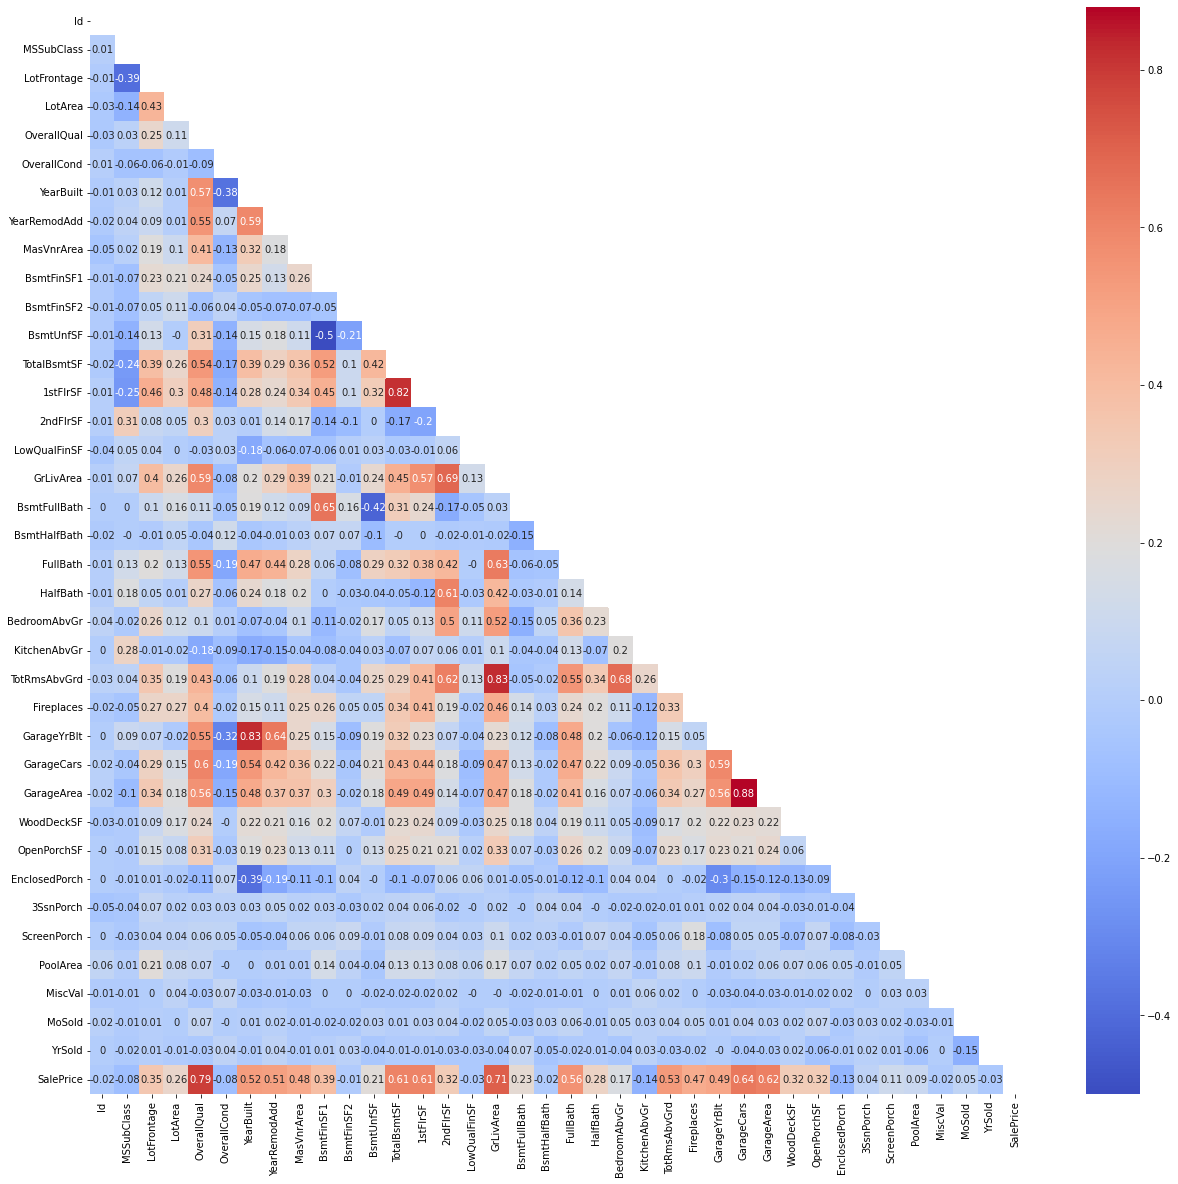

In [32]:
plt.figure(figsize=(21,20))
corr = train_dataset.corr().round(2)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# # Want diagonal elements as well
# mask[np.diag_indices_from(mask)] = False

sns.heatmap(data=corr, annot=True,cmap='coolwarm',mask=mask)
plt.xticks(rotation=90)
plt.show()

# Detailed report of the dataset

In [ ]:
# pp.ProfileReport(train_dataset)

# enabled colab mode in pycaret

In [33]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# import pycaret regression 

In [34]:
from pycaret.regression import *

# Setting up Environment in PyCaret

In [35]:
#list of columns that are categorical
cat_f = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']

In [36]:
housing = setup (train_dataset, target = 'SalePrice', 
                categorical_features = cat_f,
                ignore_features= ['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','Id'],
                ordinal_features = {
                         'Utilities' : ['AllPub', 'NoSeWa'],
                           'LandSlope':['Gtl', 'Mod', 'Sev'],
                           'OverallQual':['1','2','3','4','5','6','7','8','9','10'],
                           'MoSold':['1','2','3','4','5','6','7','8','9','10','11','12'],
                       },
                high_cardinality_features =['Neighborhood','Exterior2nd','MSSubClass','Exterior1st'],
                normalize = True,
                transformation = True,
                session_id = 123,
                remove_multicollinearity = True, #rop one of the two features that are highly correlated with each other
                ignore_low_variance = True,#all categorical features with statistically insignificant variances are removed from the dataset.
                combine_rare_levels = True,# all levels in categorical features below the threshold defined in rare_level_threshold param are combined together as a single level
      )

,Description,Value
0,session_id,123
1,Target,SalePrice
2,Original Data,"(1460, 81)"
3,Missing Values,True
4,Numeric Features,18
5,Categorical Features,56
6,Ordinal Features,True
7,High Cardinality Features,True
8,High Cardinality Method,frequency
9,Transformed Train Set,"(1021, 195)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['MSZoning',
                                                            'Street',
                                                            'LotShape',
                                                            'LandContour',
                                                            'Utilities',
                                                            'LotConfig',
                                                            'LandSlope',
                                                            'Neighborhood',
                                                            'Condition1',
                                                            'Condition2',
                                                            'BldgType',
                                  

# Viewing the pre-processed data

In [37]:
#Viewing the pre-processed data
get_config('X')

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=X)
INFO:logs:Global variable: X returned as       MSSubClass  LotFrontage   LotArea  Neighborhood  OverallQual  YearBuilt  \
0       0.101561    -0.115967 -0.144578      1.005239          6.0   1.174230   
1       1.191333     0.587689  0.152734     -1.952667          5.0   0.036983   
2       0.101561     0.036246  0.512225      1.005239          6.0   1.080564   
3      -1.081688    -0.382326  0.140627     -0.540071          6.0  -1.590080   
4       0.101561     0.755792  1.014497     -1.126144          7.0   1.034253   
...          ...          ...       ...           ...          ...        ...   
1455    0.101561    -0.273975 -0.295939     -0.210315          5.0   0.988293   
1456    1.191333     0.796863  0.851354     -0.043558          5.0   0.110970   
1457   -1.081688    -0.064562  0.013420     -0.540071          6.0  -0.999814   
1458    1.191333     0.036246  0.180776      1.633374          4.0  -0.768548   

,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,MasVnrArea,BsmtFinSF1,...,SaleType_ConLD,SaleType_ConLI,SaleType_New,SaleType_WD,SaleType_others_infrequent,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
0,0.101561,-0.115967,-0.144578,1.005239,6.0,1.174230,0.905958,1.232579,1.242475,0.807978,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.191333,0.587689,0.152734,-1.952667,5.0,0.036983,-0.644216,-0.319949,-0.767570,1.208643,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.101561,0.036246,0.512225,1.005239,6.0,1.080564,0.830365,1.232579,1.104913,0.385752,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.081688,-0.382326,0.140627,-0.540071,6.0,-1.590080,-0.868421,-0.282093,-0.767570,-0.353828,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.101561,0.755792,1.014497,-1.126144,7.0,1.034253,0.683122,1.232579,1.581561,0.720078,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.101561,-0.273975,-0.295939,-0.210315,5.0,0.988293,0.683122,1.232579,-0.767570,-1.141898,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1456,1.191333,0.796863,0.851354,-0.043558,5.0,0.110970,-0.084239,-1.115639,0.858377,0.942746,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1457,-1.081688,-0.064562,0.013420,-0.540071,6.0,-0.999814,1.140479,-1.481590,-0.767570,-0.168291,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1458,1.191333,0.036246,0.180776,1.633374,4.0,-0.768548,0.404751,-0.319949,-0.767570,-0.948428,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


# All the models that are available are 

In [38]:
#all the models that are available are 
models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


# Comparing all Regression models

In [39]:
best_model = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.583210e+04,7.108607e+08,2.606662e+04,8.949000e-01,0.1294,9.260000e-02,5.789
gbr,Gradient Boosting Regressor,1.723731e+04,7.331099e+08,2.654039e+04,8.877000e-01,0.1383,1.017000e-01,0.507
xgboost,Extreme Gradient Boosting,1.823861e+04,9.256249e+08,2.936233e+04,8.644000e-01,0.1497,1.075000e-01,1.061
lightgbm,Light Gradient Boosting Machine,1.790105e+04,9.242233e+08,2.953328e+04,8.628000e-01,0.1461,1.051000e-01,0.165
rf,Random Forest Regressor,1.847285e+04,9.834774e+08,3.041428e+04,8.536000e-01,0.1526,1.100000e-01,1.729
huber,Huber Regressor,1.822014e+04,1.072385e+09,3.164050e+04,8.405000e-01,0.1673,1.078000e-01,0.103
br,Bayesian Ridge,1.954198e+04,1.116745e+09,3.247566e+04,8.332000e-01,0.1698,1.176000e-01,0.054
par,Passive Aggressive Regressor,1.950110e+04,1.145986e+09,3.300646e+04,8.299000e-01,0.1665,1.161000e-01,0.255
ada,AdaBoost Regressor,2.501632e+04,1.212820e+09,3.451364e+04,8.144000e-01,0.2013,1.634000e-01,0.307
en,Elastic Net,2.028249e+04,1.263678e+09,3.458387e+04,8.140000e-01,0.1762,1.171000e-01,0.023


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 2
INFO:logs:<catboost.core.CatBoostRegressor object at 0x7f6290083190>
INFO:logs:compare_models() succesfully completed......................................


# Creating the model

Since CatBoost Regressor has the highest R2 Score, now will use that model

In [40]:
model_catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,18393.2157,1.268907e+09,35621.7242,0.8450,0.1676,0.1091
1,14827.7583,5.983367e+08,24460.9217,0.9066,0.1160,0.0811
2,13492.1728,3.751976e+08,19370.0177,0.9188,0.1181,0.0862
3,15201.7603,5.622498e+08,23711.8063,0.8916,0.1238,0.0916
4,18346.8653,1.303736e+09,36107.2888,0.8674,0.1587,0.1091
5,15447.8657,7.308180e+08,27033.6464,0.8988,0.1257,0.0912
6,15245.9191,4.653217e+08,21571.3170,0.9013,0.1145,0.0874
7,15816.8072,5.773451e+08,24028.0058,0.9153,0.1296,0.0939
8,17259.0732,8.254794e+08,28731.1576,0.8768,0.1361,0.0968


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 3
INFO:logs:<catboost.core.CatBoostRegressor object at 0x7f628f84df90>
INFO:logs:create_model() succesfully completed......................................


In [42]:
# predict
predict_model(model_catboost)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=<catboost.core.CatBoostRegressor object at 0x7f628f84df90>, probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,14363.8679,5.828059e+08,24141.3725,0.8983,0.1158,0.0805


,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,MasVnrArea,BsmtFinSF1,...,SaleType_New,SaleType_WD,SaleType_others_infrequent,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SalePrice,Label
0,0.101561,0.102931,0.129668,-0.210315,6.0,1.080564,0.756083,1.232579,1.182505,-1.141898,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,222500,224971.038068
1,-1.081688,-0.382326,0.152734,0.654900,3.0,-1.892935,-1.471769,-1.827633,-0.767570,-1.141898,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,87000,116104.839960
2,-1.107601,-2.105419,-1.956631,0.253505,6.0,1.221580,0.982848,1.232579,0.844103,-1.141898,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,130000,145294.963722
3,0.101561,0.367730,0.188613,1.005239,6.0,0.942689,0.541215,1.232579,-0.767570,1.204723,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,274300,244496.774840
4,-0.644308,-0.382326,0.448237,1.633374,4.0,-0.899164,-1.471769,-0.319949,-0.767570,0.580864,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,140000,133042.480413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,-1.081688,-0.382326,-0.614944,-0.949800,5.0,-1.610994,1.140479,-0.282093,-0.767570,-1.141898,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,127000,121558.355744
435,-1.343924,-0.956577,-0.913420,0.654900,4.0,-0.659725,-1.364248,-0.282093,-0.767570,-1.141898,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,93000,108647.823806
436,0.101561,0.587689,0.301224,-0.280336,7.0,1.269269,1.061026,1.232579,1.174452,-1.141898,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,275500,270976.496631
437,0.101561,0.796863,0.384847,-0.280336,6.0,1.174230,0.982848,1.232579,1.488670,1.055538,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,284000,257638.180098


# Tune the model

In [43]:
tuned_model_catboost=tune_model(model_catboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,22370.5486,1.737510e+09,41683.4470,0.7878,0.1910,0.1325
1,18865.4676,9.443462e+08,30730.2162,0.8526,0.1430,0.1042
2,14309.1121,3.623730e+08,19036.0984,0.9215,0.1238,0.0919
3,17557.4579,7.100188e+08,26646.1787,0.8631,0.1433,0.1039
4,19878.8054,1.190160e+09,34498.6920,0.8789,0.1735,0.1243
5,17367.7032,7.479332e+08,27348.3670,0.8964,0.1381,0.1023
6,18249.2662,6.900387e+08,26268.5877,0.8536,0.1321,0.1025
7,19409.4514,7.353290e+08,27116.9506,0.8921,0.1437,0.1135
8,19617.0293,8.092346e+08,28447.0499,0.8792,0.1486,0.1155


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 6
INFO:logs:<catboost.core.CatBoostRegressor object at 0x7f62900de590>
INFO:logs:tune_model() succesfully completed......................................


In [44]:
# predict
predict_model(tuned_model_catboost)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=<catboost.core.CatBoostRegressor object at 0x7f62900de590>, probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,16778.3999,7.379579e+08,27165.3804,0.8712,0.1296,0.0934


,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,MasVnrArea,BsmtFinSF1,...,SaleType_New,SaleType_WD,SaleType_others_infrequent,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SalePrice,Label
0,0.101561,0.102931,0.129668,-0.210315,6.0,1.080564,0.756083,1.232579,1.182505,-1.141898,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,222500,223802.801523
1,-1.081688,-0.382326,0.152734,0.654900,3.0,-1.892935,-1.471769,-1.827633,-0.767570,-1.141898,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,87000,107845.512767
2,-1.107601,-2.105419,-1.956631,0.253505,6.0,1.221580,0.982848,1.232579,0.844103,-1.141898,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,130000,164316.247068
3,0.101561,0.367730,0.188613,1.005239,6.0,0.942689,0.541215,1.232579,-0.767570,1.204723,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,274300,254470.301575
4,-0.644308,-0.382326,0.448237,1.633374,4.0,-0.899164,-1.471769,-0.319949,-0.767570,0.580864,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,140000,140170.606485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,-1.081688,-0.382326,-0.614944,-0.949800,5.0,-1.610994,1.140479,-0.282093,-0.767570,-1.141898,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,127000,121110.641687
435,-1.343924,-0.956577,-0.913420,0.654900,4.0,-0.659725,-1.364248,-0.282093,-0.767570,-1.141898,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,93000,100818.042726
436,0.101561,0.587689,0.301224,-0.280336,7.0,1.269269,1.061026,1.232579,1.174452,-1.141898,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,275500,244809.339678
437,0.101561,0.796863,0.384847,-0.280336,6.0,1.174230,0.982848,1.232579,1.488670,1.055538,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,284000,242004.534773


# Plotting the Model

In [45]:
plot_model?

# Residual Plot

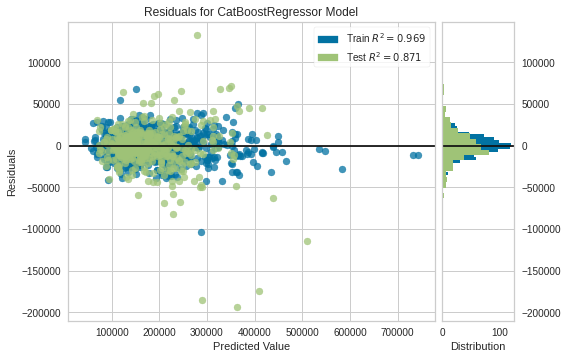

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [46]:
plot_model(tuned_model_catboost)

# Prediction error plot

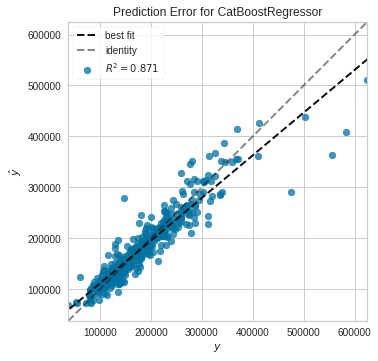

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [47]:
plot_model(tuned_model_catboost, plot = 'error')

# Feature importance plot

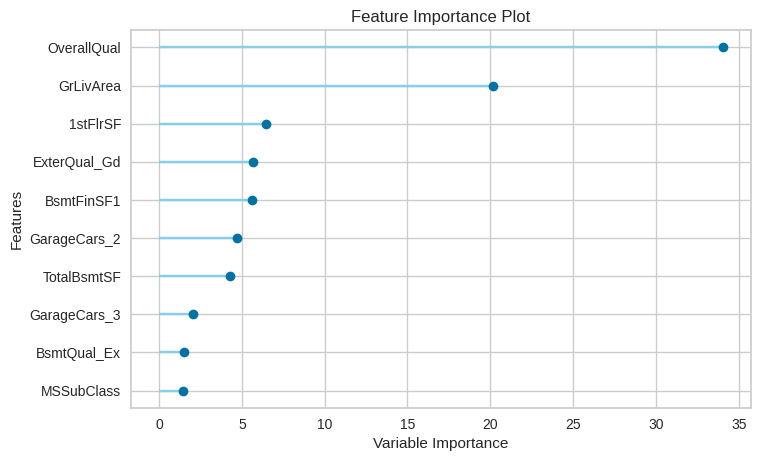

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [48]:
plot_model(tuned_model_catboost, plot = 'feature')

In [49]:
evaluate_model(tuned_model_catboost)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=<catboost.core.CatBoostRegressor object at 0x7f62900de590>, fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Finalizing model for deployment

In [50]:
final_model=finalize_model(tuned_model_catboost)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=<catboost.core.CatBoostRegressor object at 0x7f62900de590>, fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing <catboost.core.CatBoostRegressor object at 0x7f62900de590>
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=<catboost.core.CatBoostRegressor object at 0x7f62900de590>, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=False, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Declaring custom model
INFO:logs:CatBoost Regressor Imported s

In [51]:
predict_model(final_model)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=<catboost.core.CatBoostRegressor object at 0x7f62bce385d0>, probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,10665.1747,2.331494e+08,15269.2292,0.9593,0.0866,0.0628


,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,MasVnrArea,BsmtFinSF1,...,SaleType_New,SaleType_WD,SaleType_others_infrequent,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SalePrice,Label
0,0.101561,0.102931,0.129668,-0.210315,6.0,1.080564,0.756083,1.232579,1.182505,-1.141898,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,222500,223730.067378
1,-1.081688,-0.382326,0.152734,0.654900,3.0,-1.892935,-1.471769,-1.827633,-0.767570,-1.141898,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,87000,110097.197439
2,-1.107601,-2.105419,-1.956631,0.253505,6.0,1.221580,0.982848,1.232579,0.844103,-1.141898,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,130000,148094.041256
3,0.101561,0.367730,0.188613,1.005239,6.0,0.942689,0.541215,1.232579,-0.767570,1.204723,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,274300,253941.668432
4,-0.644308,-0.382326,0.448237,1.633374,4.0,-0.899164,-1.471769,-0.319949,-0.767570,0.580864,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,140000,142302.509363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,-1.081688,-0.382326,-0.614944,-0.949800,5.0,-1.610994,1.140479,-0.282093,-0.767570,-1.141898,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,127000,115489.402965
435,-1.343924,-0.956577,-0.913420,0.654900,4.0,-0.659725,-1.364248,-0.282093,-0.767570,-1.141898,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,93000,100536.096262
436,0.101561,0.587689,0.301224,-0.280336,7.0,1.269269,1.061026,1.232579,1.174452,-1.141898,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,275500,284152.686957
437,0.101561,0.796863,0.384847,-0.280336,6.0,1.174230,0.982848,1.232579,1.488670,1.055538,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,284000,264970.687734


# Predicting on the Test set

In [58]:
# predict_model(final_model, data=test_dataset)
prediction=predict_model(final_model, data=X_test)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=<catboost.core.CatBoostRegressor object at 0x7f62bce385d0>, probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,55595.545,5.581271e+09,74707.9013,-19.4692,0.3671,0.3093


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Label
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498,125190.849502
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989,168854.914163
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570,182854.213265
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511,176090.758587
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977,183463.951584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2006,WD,Normal,167081.220949,87551.184150
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2006,WD,Abnorml,164788.778231,71704.485681
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2006,WD,Abnorml,219222.423400,165214.637563
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,184924.279659,122512.249821


In [64]:
p1=prediction[['Id', 'Label']]
prediction_data=Y_test.merge(p1,on='Id')
prediction_data.head()

,Id,SalePrice,Label
0,1461,169277.052498,125190.849502
1,1462,187758.393989,168854.914163
2,1463,183583.683570,182854.213265
3,1464,179317.477511,176090.758587
4,1465,150730.079977,183463.951584


In [65]:
prediction_data.to_csv('test_prediction.csv')